In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%pip install kneed
from kneed import KneeLocator

Note: you may need to restart the kernel to use updated packages.


# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [164]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/eabigails/Week8_DM/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df =df.rename(columns={"Annual Income (k$)" : "Annual Income"})
df =df.rename(columns={"Spending Score (1-100)" : "Spending Score"})

df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [166]:
# describe data
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [167]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

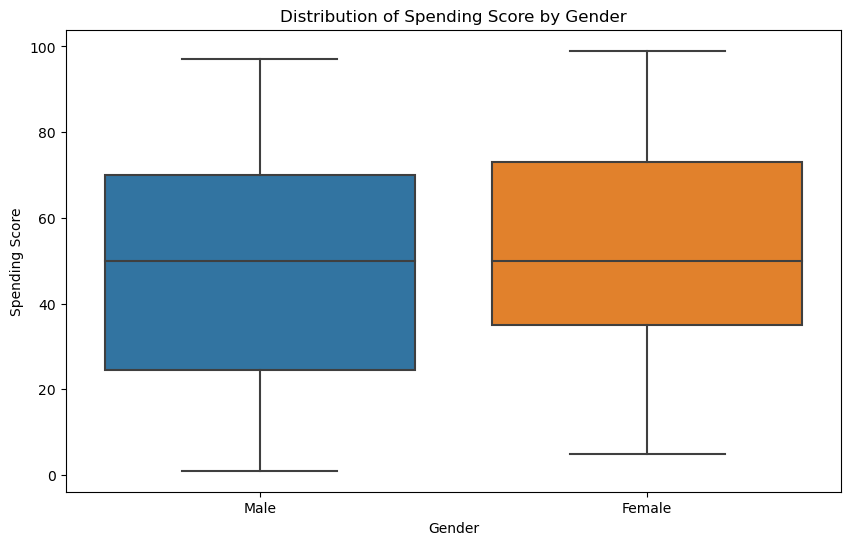

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="Spending Score", data=df)
plt.title("Distribution of Spending Score by Gender")
plt.show()

# Female have higher spending score average than male. 

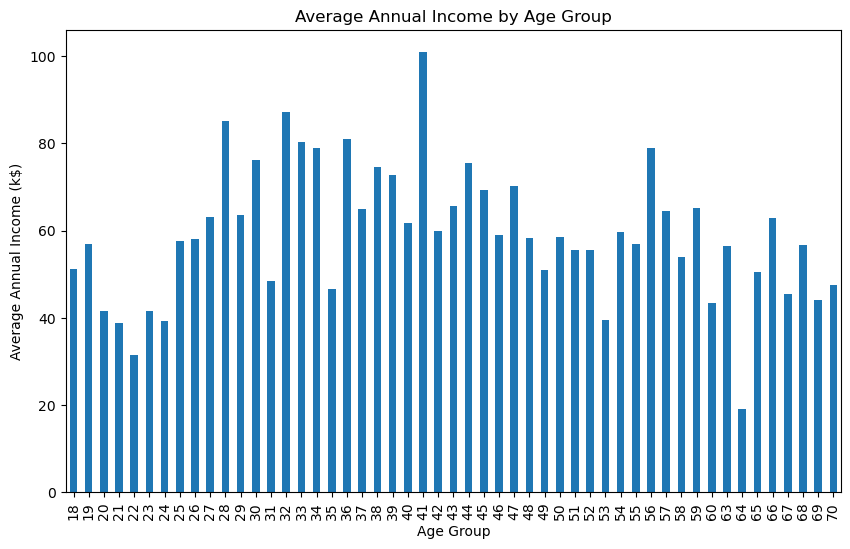

In [ ]:
avg_income_age_group = df.groupby("Age")["Annual Income"].mean()
plt.figure(figsize=(10, 6))
avg_income_age_group.plot(kind="bar")
plt.title("Average Annual Income by Age Group")
plt.ylabel("Average Annual Income (k$)")
plt.xlabel("Age Group")
plt.show()

# People on their 40s tend to have higher annual income than the people on their 20s or 30s. 

## Data Preprocessing

For this case study, we only use income and spending score

In [170]:
# create new dataframe that consist only annual income and spending score
df_income_spending = df[["Annual Income", "Spending Score"]]

df_income_spending

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [171]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_income_spending = pd.DataFrame(sc.fit_transform(df_income_spending), columns=["Income","Spending"])
df_income_spending.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [172]:
# get stastical information on the new dataset
df_income_spending.describe()

,Income,Spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

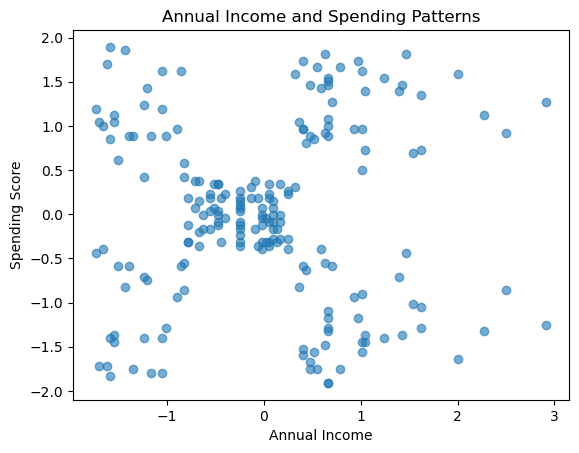

In [173]:
# Visualize the position

plt.scatter(df_income_spending["Income"], df_income_spending["Spending"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income and Spending Patterns")
plt.show()

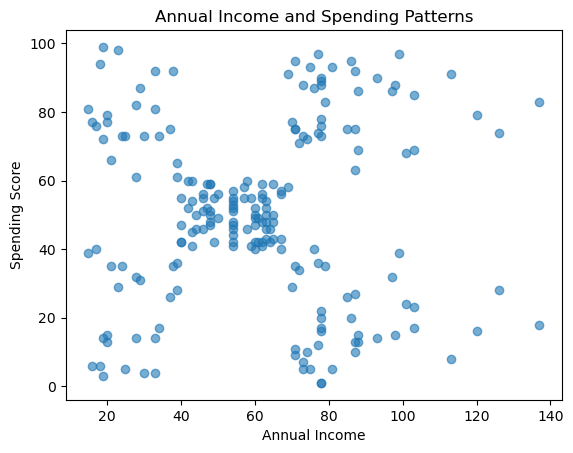

In [174]:
# Visualize the position using the original scale

plt.scatter(df["Annual Income"], df["Spending Score"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income and Spending Patterns")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [175]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_income_spending)
    sse.append(kmeans.inertia_)

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

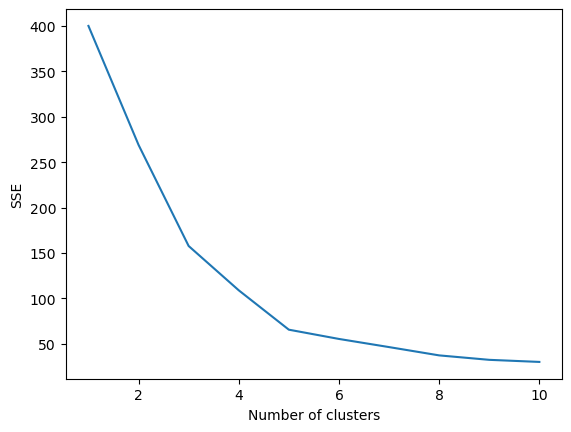

In [176]:
# manually visualize the elbow method using plotlib

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [177]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [178]:
# assign cluster with K-Means algorithm

from sklearn.cluster import KMeans

# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_income_spending)
y_pred

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

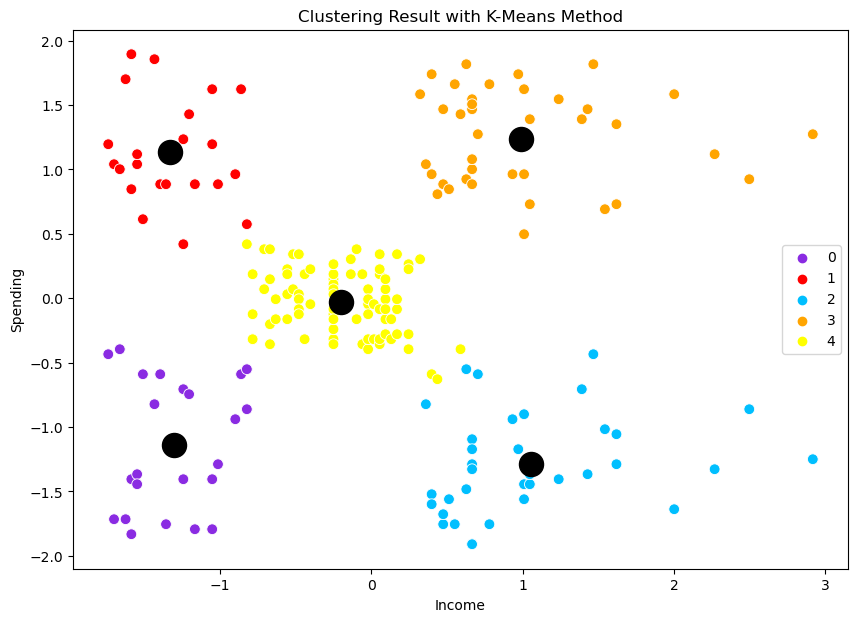

In [179]:
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Spending", hue=y_pred, palette=["blueviolet", "red", "deepskyblue","orange","yellow"], data=df_income_spending, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [180]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df_income_spending), columns=["Income", "Spending"])

# Add the cluster labels to the original data
df['Cluster'] = y_pred

# analyze the clusters with the original values
df.head()

,Income,Spending,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [182]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'Spending': ['mean', 'std', 'min', 'max'],
                                              'Income': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Spending                            Income                        
              mean        std   min   max       mean        std   min    max
cluster                                                                     
0        20.913043  13.017167   3.0  40.0  26.304348   7.893811  15.0   39.0
1        79.363636  10.504174  61.0  99.0  25.727273   7.566731  15.0   39.0
2        17.114286   9.952154   1.0  39.0  88.200000  16.399067  70.0  137.0
3        82.128205   9.364489  63.0  97.0  86.538462  16.312485  69.0  137.0
4        49.518519   6.530909  34.0  61.0  55.296296   8.988109  39.0   76.0

Cluster 0: Customer in this cluster have relatively low spending score which mean they are more budget-concious. (Spending score = 20.91, Income = 26.30k)

Cluster 1: Customer in this cluster spend significantly more than any other cluster but their income is still moderate. (Spending score = 79.36, Income = 25,73k)

Cluster 2: High annual income with low spending score. (Spending score = 17.11, Income = 88.20k)

Cluster 3: In this cluster the customers have both high income and high spending score. They are more likely to be loyal and frequent buyers. (Spending score = 82.13, Income = 86.54k)

Cluster 4: Customer in this cluster have moderate spending habits and higher income than the first two. (Spending score 49.52, Income = 55.30k)

Suggestion for company:
1. Cluster 0: Offer discounts or introduce affordable loyalty programs
2. Cluster 1: Develop promotions and highlight trending products. 
3. Cluster 2: Create exclusive high end products
4. Cluster 3: Offering premiums loyalty rewards
5. Cluster 4: Consider loyalty programs or byndles to increase their spending frequency.

<write here>